In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('data/student.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Missing values check

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# Duplicate check

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Unique values in each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
print("Category in gender column:", end=" ")
print(df['gender'].unique())

print("Category in race_ethnicity column:", end=" ")
print(df['race_ethnicity'].unique())

print("Category in parental_level_of_education column:", end=" ")
print(df['parental_level_of_education'].unique())

print("Category in lunch column:", end=" ")
print(df['lunch'].unique())

print("Category in test_preparation_course column:", end=" ")
print(df['test_preparation_course'].unique())

Category in gender column: ['female' 'male']
Category in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']
Category in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Category in lunch column: ['standard' 'free/reduced']
Category in test_preparation_course column: ['none' 'completed']


In [21]:
# Get numerical and categorical features 
numerical_features   = [ col for col in df.columns if df[col].dtype != 'O']
categorical_features = [ col for col in df.columns if df[col].dtype == 'O']

print(f"Numerical features({len(numerical_features)}): {numerical_features}")
print(f"Categorical features({len(categorical_features)}): {categorical_features}")

Numerical features(3): ['math_score', 'reading_score', 'writing_score']
Categorical features(5): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding 'Total score' and 'Average score'

In [25]:
df['Total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average']     = df['Total score']/3

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full_score = df['reading_score'][df['reading_score'] == 100].count()
writing_full_score = df['writing_score'][df['writing_score'] == 100].count()
math_full_score    = df['math_score'][df['math_score'] == 100].count()

print("Total students with full score in reading_score: ", reading_full_score)
print("Total students with full score in writing_score: ", writing_full_score)
print("Total students with full score in math_score: ", math_full_score)

Total students with full score in reading_score:  17
Total students with full score in writing_score:  14
Total students with full score in math_score:  7


# Visualization

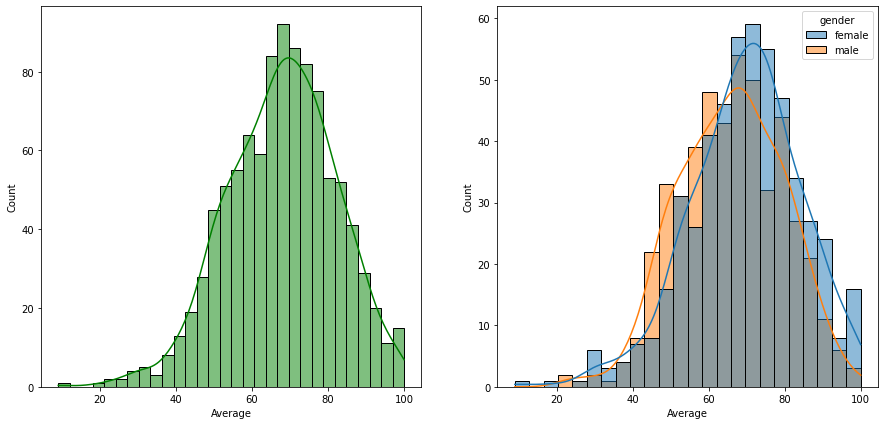

In [32]:
fig, axis = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

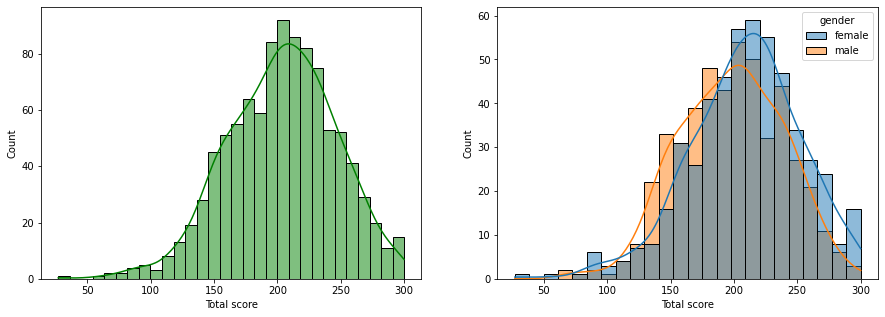

In [36]:
fix, axis = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=df, x='Total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total score', kde=True, hue='gender')
plt.show()

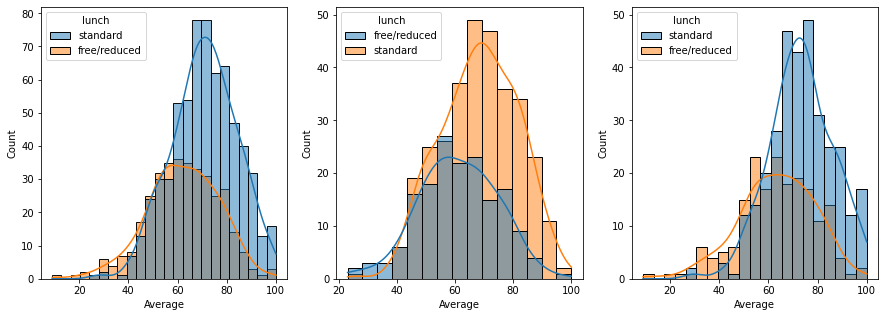

In [40]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='Average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='Average', kde=True, hue='lunch')
plt.show()

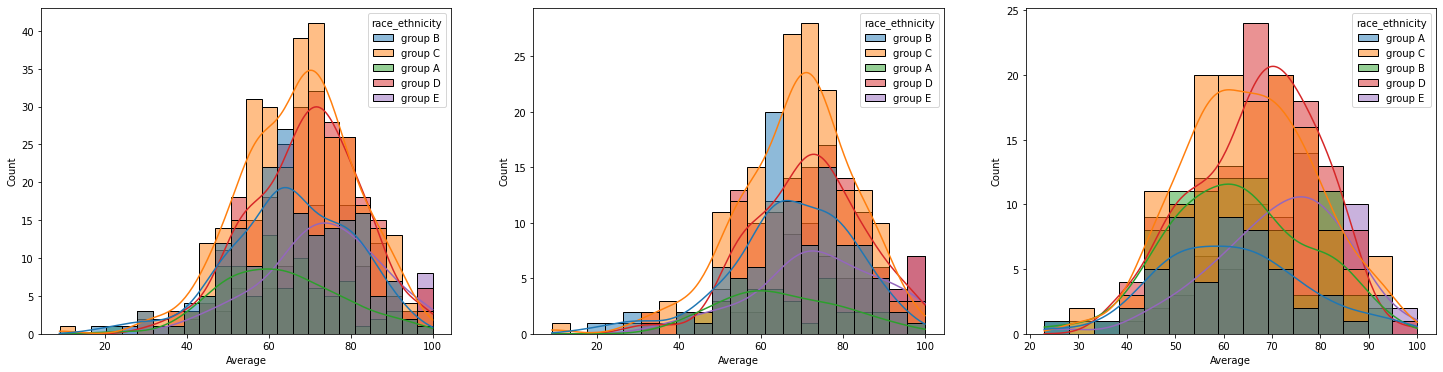

In [46]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average',kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='race_ethnicity')
plt.show()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='Average',kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='race_ethnicity')
plt.show()